In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Given specification
Op=2*np.pi*2000 #rad/s
Os=3*np.pi*2000 #rad/s
R=-1
A=-15
T=0.4e-3
fs=1/T

s1=10**(R/20) # R in amplitude
s2=10**(A/20) # A in amplitude
k1=(1/(s1**2))-1
k2=(1/(s2**2))-1
N=0.5*np.log10(k2/k1)/np.log10(Os/Op)

print(f"N={np.round(N,2)}")

N=5.89


In [ ]:
wp=2*np.arctan((Op*T)/2)
print (f"wp: {np.round(wp,2)} rad/am")
print (f"wp: {np.round(wp*(1/T),2)} rad/s")

wp: 2.38 rad/am
wp: 5960.56 rad/s


In [ ]:
ws=2*np.arctan((Os*T)/2)
print (f"ws: {np.round(ws,2)} rad/am")
print (f"ws: {np.round(ws*(1/T),2)} rad/s")

ws: 2.62 rad/am
ws: 6557.55 rad/s


In [ ]:
N, Wc = signal.buttord(Op, Os, R, A, analog=True)
b, a = signal.butter(N, Wc,'low', True)
z,p=signal.bilinear(b,a,fs)
wz, hz = signal.freqz(z,p)

No handles with labels found to put in legend.


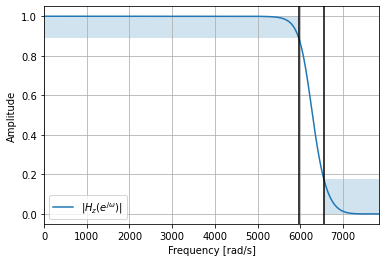

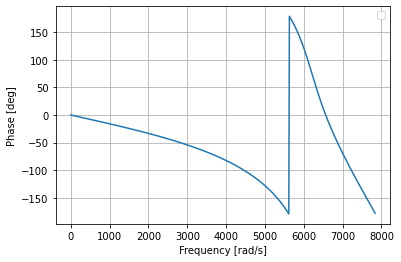

In [ ]:
plt.figure()
plt.plot(wz*fs, np.abs(hz),label=r'$|H_z(e^{j \omega})|$')
plt.xlim(0,wz[-1]*fs)
plt.axhspan(s1,1,0,(wp/wz[-1]),alpha=0.2)
plt.axhspan(0,s2,(ws/wz[-1]),1,alpha=0.2)
plt.axvline(wp*fs, color='k')
plt.axvline(ws*fs, color='k')
plt.legend()
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Amplitude')
plt.grid()

plt.figure()
plt.plot(wz*fs, (np.angle(hz))*180/np.pi)
plt.legend()
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [deg]')
plt.grid()


In [ ]:
sys = signal.TransferFunction(z, p,dt=T)
print("num {}".format(sys.num))
print("den {}".format(sys.den))

num [0.26096    1.56575998 3.91439996 5.21919995 3.91439996 1.56575998
 0.26096   ]
den [1.         3.38799751 5.14118312 4.36015036 2.15753397 0.58647451
 0.06810037]


In [ ]:
b, a = signal.butter(N, Wc,'high', True)
z,p=signal.bilinear(b,a,fs)
wz, hz = signal.freqz(z,p)

No handles with labels found to put in legend.


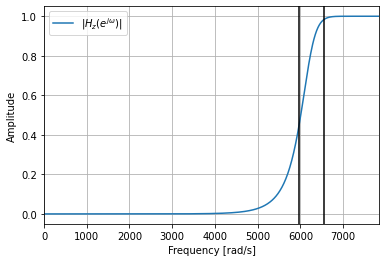

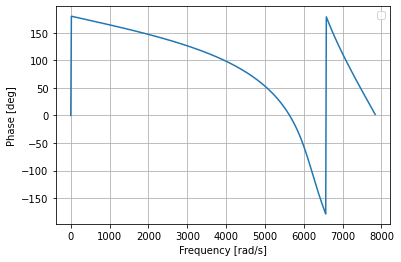

In [ ]:
plt.figure()
plt.plot(wz*fs, np.abs(hz),label=r'$|H_z(e^{j \omega})|$')
plt.xlim(0,wz[-1]*fs)
plt.axvline(wp*fs, color='k')
plt.axvline(ws*fs, color='k')
plt.legend()
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Amplitude')
plt.grid()

plt.figure()
#plt.plot(wz*fs/(2*np.pi), (np.angle(hz,True)))
#plt.plot(wz*fs/(2*np.pi), np.unwrap(np.angle(hz))*180/np.pi)
plt.plot(wz*fs, (np.angle(hz))*180/np.pi)

#plt.semilogx(wz*fs, np.angle(hz,True))
#plt.axvline(wc*fs, color='k')
plt.legend()
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [deg]')
plt.grid()


# **Exemplo da aula 6 pg.42**

In [ ]:
Op=2*np.tan(0.1*np.pi) #rad/s
Os=2*np.tan(0.3*np.pi*0.5) #rad/s
R=-1
A=-15
T=1

s1=10**(R/20)
s2=10**(A/20)
k1=(1/(s1**2))-1
k2=(1/(s2**2))-1
N=0.5*np.log10(k2/k1)/np.log10(Os/Op)

print(f"N={(N)}")

N=5.304446399829861


In [ ]:
ws=2*np.arctan((Os*T)/2)
wp=2*np.arctan((Op*T)/2)

No handles with labels found to put in legend.


cutoff freq: 0.7 rad/s


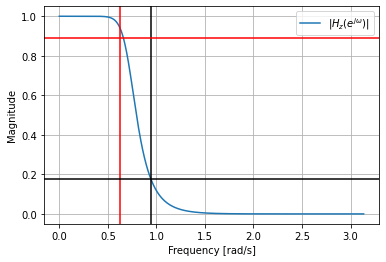

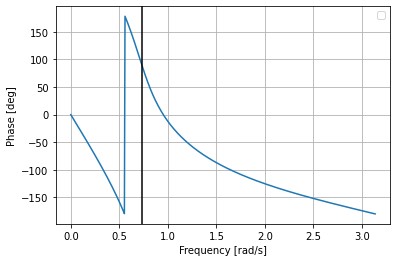

In [ ]:
N=6
#Wc=Op/(k1**(1/(2*N)))
Wc=Os/(k2**(1/(2*N)))
wc=2*np.arctan((Wc*T)/2)
fc=wc*fs/(2*np.pi)
fs=1/(T)
print(f"cutoff freq: {np.round(wc*fs,1)} rad/s")

b, a = signal.butter(N, Wc,'low', True)
z,p=signal.bilinear(b,a,fs)
wz, hz = signal.freqz(z,p)

plt.figure()
#plt.plot(wz*fs, 20*np.log10(np.abs(hz)),label=r'$|H_z(e^{j \omega})|$')
plt.plot(wz*fs, (np.abs(hz)),label=r'$|H_z(e^{j \omega})|$')
#plt.axvline(wc*fs, color='k')
plt.axvline(ws*fs, color='k')
plt.axvline(wp*fs, color='r')
plt.axhline(10**(A/20), color='k')
plt.axhline(10**(R/20), color='r')


plt.legend()
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Magnitude')
plt.grid()

plt.figure()
plt.plot(wz*fs, np.angle(hz,True))
#plt.semilogx(wz*fs/(2*np.pi), np.angle(hz,True))
plt.axvline(wc*fs, color='k')
plt.legend()
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [deg]')
plt.grid()


In [ ]:
10**(-1/20)

0.8912509381337456

In [ ]:
10**(-15/20)

0.1778279410038923

No handles with labels found to put in legend.


cutoff freq: 0.7 rad/s


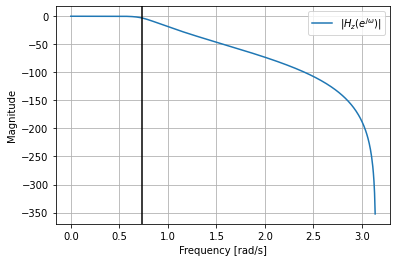

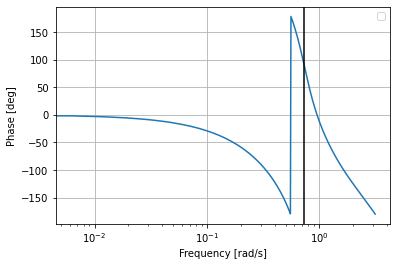

In [ ]:
N=6
#Wc=Op/(k1**(1/(2*N)))
Wc=Os/(k2**(1/(2*N)))
wc=2*np.arctan((Wc*T)/2)
fc=wc*fs/(2*np.pi)
fs=1/(T)
print(f"cutoff freq: {np.round(wc*fs,1)} rad/s")

b, a = signal.butter(N, Wc,'low', True)
z,p=signal.bilinear(b,a,fs)
wz, hz = signal.freqz(z,p)

plt.figure()
plt.plot(wz*fs, 20*np.log10(np.abs(hz)),label=r'$|H_z(e^{j \omega})|$')
#plt.plot(wz*fs, (np.abs(hz)),label=r'$|H_z(e^{j \omega})|$')
plt.axvline(wc*fs, color='k')
plt.legend()
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Magnitude')
plt.grid()

plt.figure()
#plt.plot(wz*fs, np.angle(hz,True))
plt.semilogx(wz*fs, np.angle(hz,True))
plt.axvline(wc*fs, color='k')
plt.legend()
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [deg]')
plt.grid()


In [ ]:
sys = signal.TransferFunction(z, p,dt=T)
print("num {}".format(sys.num))
print("den {}".format(sys.den))

num [0.00073782 0.00442692 0.0110673  0.0147564  0.0110673  0.00442692
 0.00073782]
den [ 1.         -3.18359175  4.62223732 -3.77947742  1.81360469 -0.4799975
  0.05444514]
